/tmp/ipython-input-12-2238479069.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2022-01-01", end="2025-07-24")
[*********************100%***********************]  1 of 1 completed


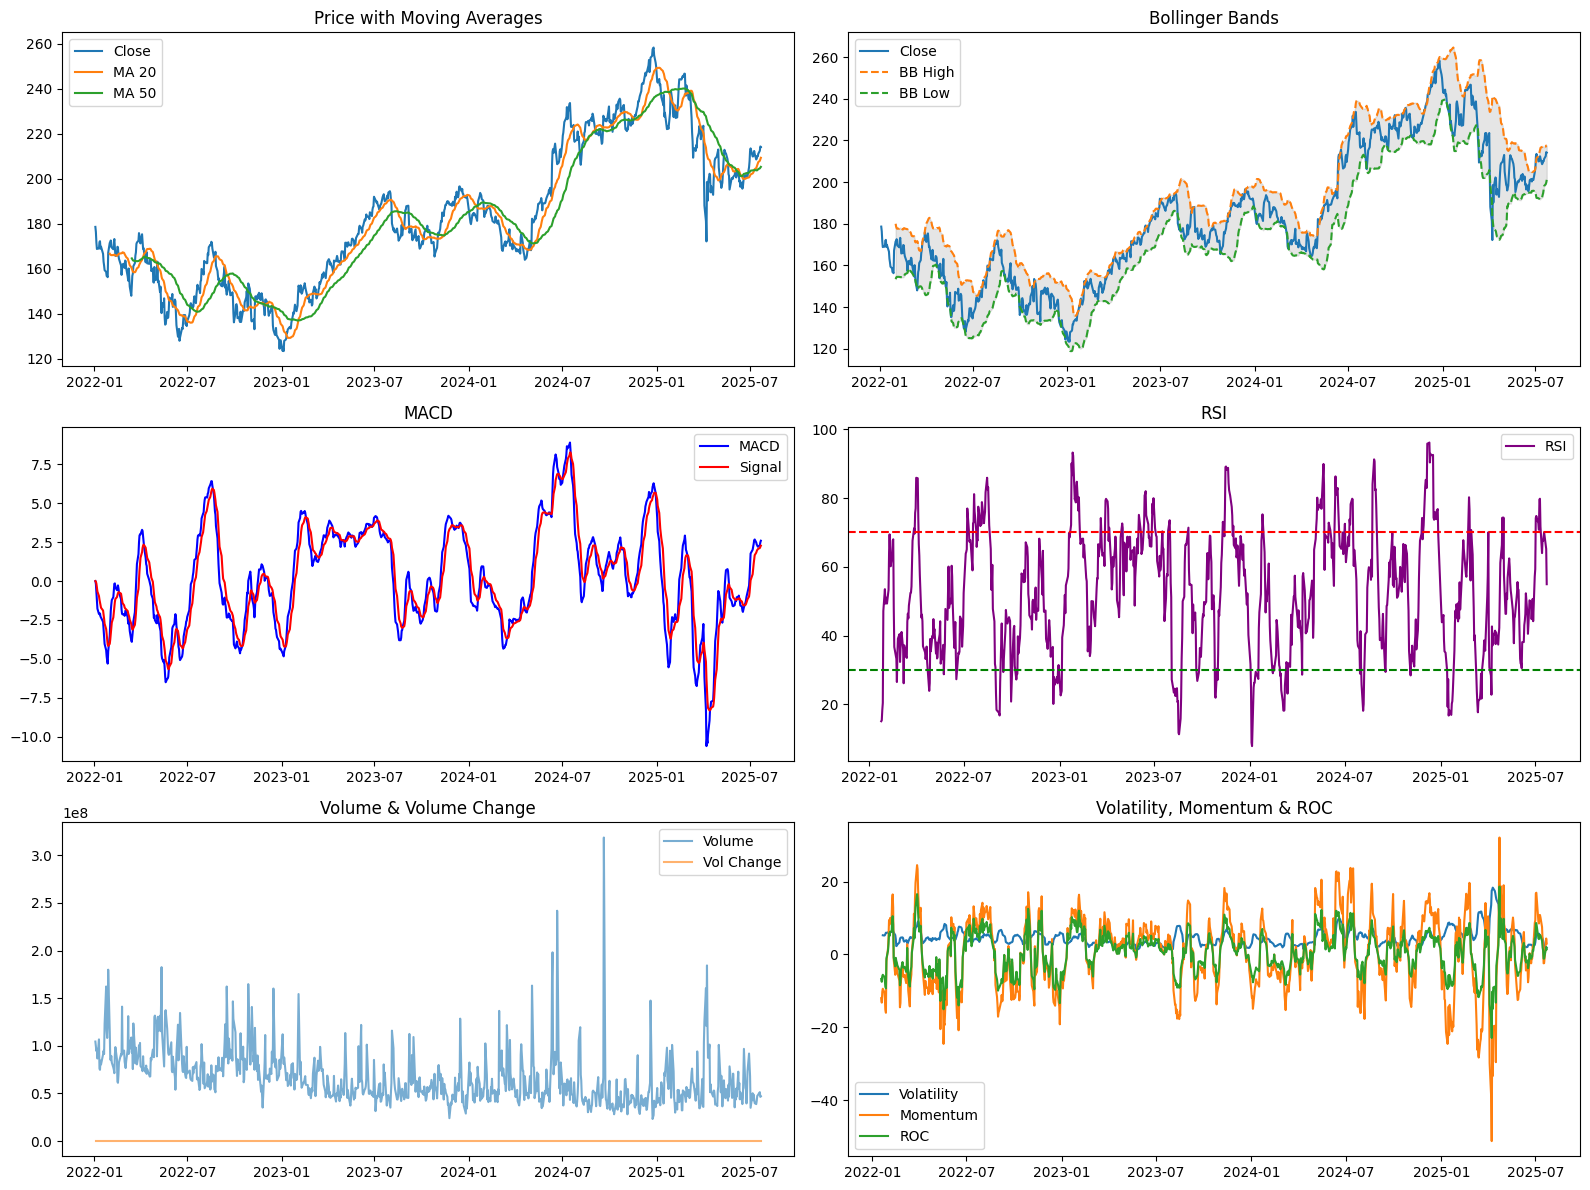

In [12]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# -------------------- 1. Download Data --------------------
ticker = "AAPL"
df = yf.download(ticker, start="2022-01-01", end="2025-07-24")
df.dropna(inplace=True)

# -------------------- 2. Moving Averages --------------------
df['MA_20'] = df['Close'].rolling(window=20).mean()
df['MA_50'] = df['Close'].rolling(window=50).mean()

# -------------------- 3. Volume Change --------------------
df['Volume_Change'] = df['Volume'].pct_change()

# -------------------- 4. Daily Return --------------------
df['Daily_Return'] = df['Close'].pct_change()

# -------------------- 5. Bollinger Bands --------------------
window = 20
rolling_mean = df['Close'].rolling(window).mean()
rolling_std = df['Close'].rolling(window).std()
df['BB_High'] = rolling_mean + (2 * rolling_std)
df['BB_Low'] = rolling_mean - (2 * rolling_std)

# -------------------- 6. MACD --------------------
exp1 = df['Close'].ewm(span=12, adjust=False).mean()
exp2 = df['Close'].ewm(span=26, adjust=False).mean()
df['MACD'] = exp1 - exp2
df['MACD_Signal'] = df['MACD'].ewm(span=9, adjust=False).mean()


# -------------------- 7. RSI (Relative Strength Index) --------------------
delta = df['Close'].diff()

gain = delta.copy()
loss = delta.copy()

gain[gain < 0] = 0
loss[loss > 0] = 0
loss = loss.abs()

# Use 14-day rolling average
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()

rs = avg_gain / avg_loss
df['RSI'] = 100 - (100 / (1 + rs))

# -------------------- 8. Volatility (Standard Deviation) --------------------
df['Volatility'] = df['Close'].rolling(window=14).std()

# -------------------- 9. Momentum --------------------
df['Momentum'] = df['Close'] - df['Close'].shift(10)

# -------------------- 10. ROC (Rate of Change) --------------------
df['ROC'] = ((df['Close'] - df['Close'].shift(10)) / df['Close'].shift(10)) * 100

# -------------------- 11. Plotting --------------------
plt.figure(figsize=(16, 12))

# Plot 1: Price with Moving Averages
plt.subplot(3, 2, 1)
plt.plot(df['Close'], label='Close')
plt.plot(df['MA_20'], label='MA 20')
plt.plot(df['MA_50'], label='MA 50')
plt.title("Price with Moving Averages")
plt.legend()

# Plot 2: Bollinger Bands
plt.subplot(3, 2, 2)
plt.plot(df['Close'], label='Close')
plt.plot(df['BB_High'], label='BB High', linestyle='--')
plt.plot(df['BB_Low'], label='BB Low', linestyle='--')
plt.fill_between(df.index, df['BB_Low'], df['BB_High'], color='gray', alpha=0.2)
plt.title("Bollinger Bands")
plt.legend()

# Plot 3: MACD
plt.subplot(3, 2, 3)
plt.plot(df['MACD'], label='MACD', color='blue')
plt.plot(df['MACD_Signal'], label='Signal', color='red')
plt.title("MACD")
plt.legend()

# Plot 4: RSI
plt.subplot(3, 2, 4)
plt.plot(df['RSI'], label='RSI', color='purple')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.title("RSI")
plt.legend()

# Plot 5: Volume & Volume Change
plt.subplot(3, 2, 5)
plt.plot(df['Volume'], label='Volume', alpha=0.6)
plt.plot(df['Volume_Change'], label='Vol Change', alpha=0.6)
plt.title("Volume & Volume Change")
plt.legend()

# Plot 6: Volatility, Momentum, ROC
plt.subplot(3, 2, 6)
plt.plot(df['Volatility'], label='Volatility')
plt.plot(df['Momentum'], label='Momentum')
plt.plot(df['ROC'], label='ROC')
plt.title("Volatility, Momentum & ROC")
plt.legend()

plt.tight_layout()
plt.show()


/tmp/ipython-input-20-877347541.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start='2022-01-01', end='2024-12-31')
[*********************100%***********************]  1 of 1 completed


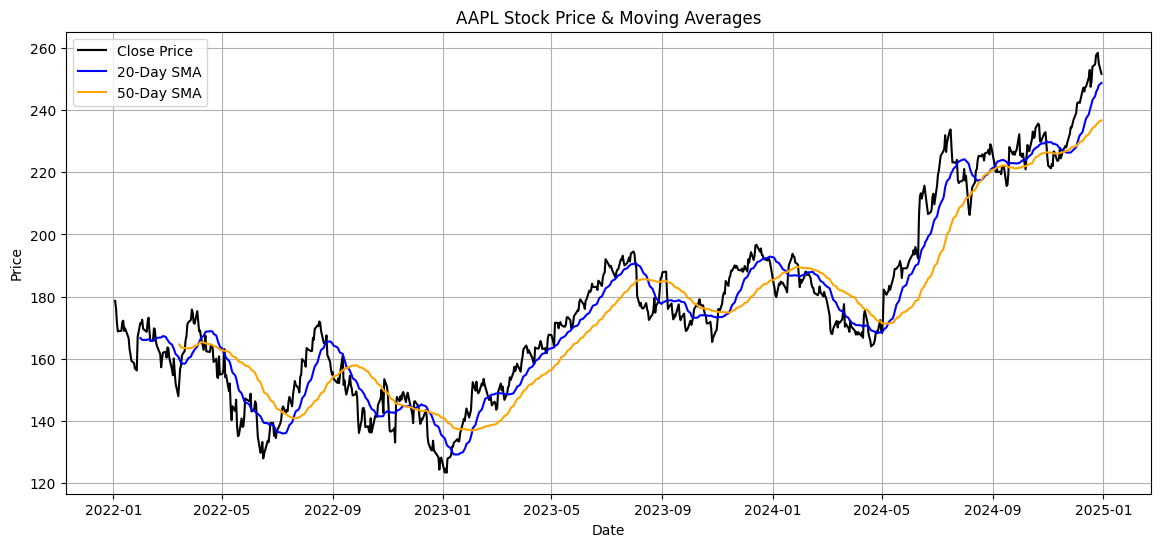

Slope: 1.1156, Trend: 📈 Uptrend


/tmp/ipython-input-20-877347541.py:53: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


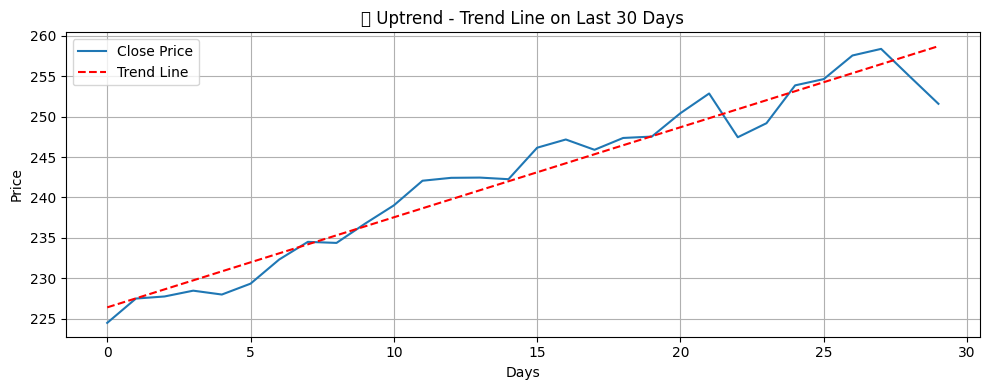

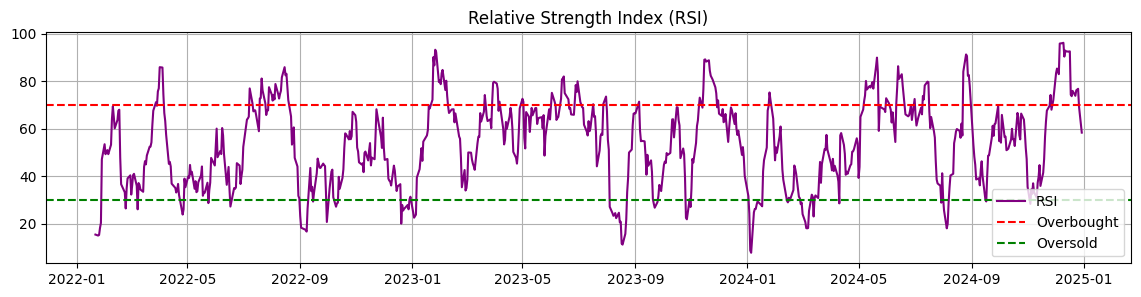

In [20]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Download stock data
ticker = 'AAPL'  # You can change this to any stock, e.g., 'RELIANCE.NS'
df = yf.download(ticker, start='2022-01-01', end='2024-12-31')
df = df[['Open', 'High', 'Low', 'Close', 'Volume']]

# Calculate Moving Averages
df['SMA_20'] = df['Close'].rolling(window=20).mean()
df['SMA_50'] = df['Close'].rolling(window=50).mean()

# Plot Moving Averages and Close Price
plt.figure(figsize=(14, 6))
plt.plot(df['Close'], label='Close Price', color='black')
plt.plot(df['SMA_20'], label='20-Day SMA', color='blue')
plt.plot(df['SMA_50'], label='50-Day SMA', color='orange')
plt.title(f'{ticker} Stock Price & Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

# Trend Detection using Linear Regression
N = 30

if len(df) >= N:
    x = np.arange(N)
    y = df['Close'].tail(N).values.flatten()  # Flatten to ensure it's 1D

    # Check for flat data (no variation)
    if np.all(y == y[0]):
        print("⚠️ Flat trend detected — cannot compute regression.")
    else:
        # Perform linear regression
        slope, intercept, r_value, p_value, std_err = linregress(x, y)
        trend = "📈 Uptrend" if slope > 0 else "📉 Downtrend" if slope < 0 else "🔁 Sideways"
        print(f"Slope: {slope:.4f}, Trend: {trend}")

        # Plot the trend
        plt.figure(figsize=(10, 4))
        plt.plot(df['Close'].tail(N).values, label='Close Price')
        plt.plot(intercept + slope * x, label='Trend Line', linestyle='--', color='red')
        plt.title(f"{trend} - Trend Line on Last {N} Days")
        plt.xlabel("Days")
        plt.ylabel("Price")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()
else:
    print("⚠️ Not enough data to analyze trend.")
# RSI Calculation
delta = df['Close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
df['RSI'] = 100 - (100 / (1 + rs))

# Plot RSI
plt.figure(figsize=(14, 3))
plt.plot(df['RSI'], label='RSI', color='purple')
plt.axhline(70, color='red', linestyle='--', label='Overbought')
plt.axhline(30, color='green', linestyle='--', label='Oversold')
plt.title('Relative Strength Index (RSI)')
plt.legend()
plt.grid()
plt.show()
